In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### This is a tutorial for running a saved treatment train. The steps are:
#### 1. Load treatment train. Microfiltration to Reverse Osmosis to Chlorination.
#### 2. Check and set feedwater flow
#### 3. Build and run model
#### 4. Check results
#### 5. Run with alternative cost method (TWB vs. WT3)


##### Import WaterTAP3 Package

In [2]:
import watertap as wt

##### Step 1: Load treatment train.

In [3]:
#### LOAD TRAIN ####
path = "trains/twb_trains/twb_mf_ro_cl2.csv"
T = wt.load_train(path)

In [4]:
# display command
wt.display.show_train(T)

##### Step 2: Check and set inlet flow

In [5]:
T.nodes['source']['Flow']

0

In [6]:
T.nodes['source']['Flow'] = 37854.118 # sets flow. units in m3/d. 37854.118 m3/d = 10 million gallons per day 

In [7]:
T.nodes['source']['Flow']

37854.118

##### Step 3:  Build and run model.

In [8]:
M = wt.build_model(T)

In [9]:
wt.run_model(model=M)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 42, 'Number of variables': 42, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.12.12\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.3844258785247803}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

##### Step 5: Check results

In [11]:
analysis_variables = ['Flow', 'TOC' , 'Nitrate', 'Cost', 'TDS']

In [12]:
model_results = wt.post_processing.get_result_table(M, analysis_variables)

In [13]:
model_results

,Flow,TOC,Nitrate,Cost,TDS
microfiltration_twb_feedwater,37854.118,140.0,0.0,0.000,0.0
microfiltration_twb,37854.118,140.0,0.0,23.620,0.0
microfiltration_twb_waste_stream,1892.706,0.0,0.0,0.000,0.0
microfiltration_twb_use_stream,35961.412,140.0,0.0,0.000,0.0
ro_twb_feedwater,35961.412,140.0,0.0,0.000,0.0
ro_twb,35961.412,140.0,0.0,33.663,0.0
ro_twb_waste_stream,7192.282,133.0,0.0,0.000,0.0
ro_twb_use_stream,28769.130,7.0,0.0,0.000,0.0
chlorination_twb_feedwater,28769.130,7.0,0.0,0.000,0.0
chlorination_twb,28769.130,7.0,0.0,3.331,0.0


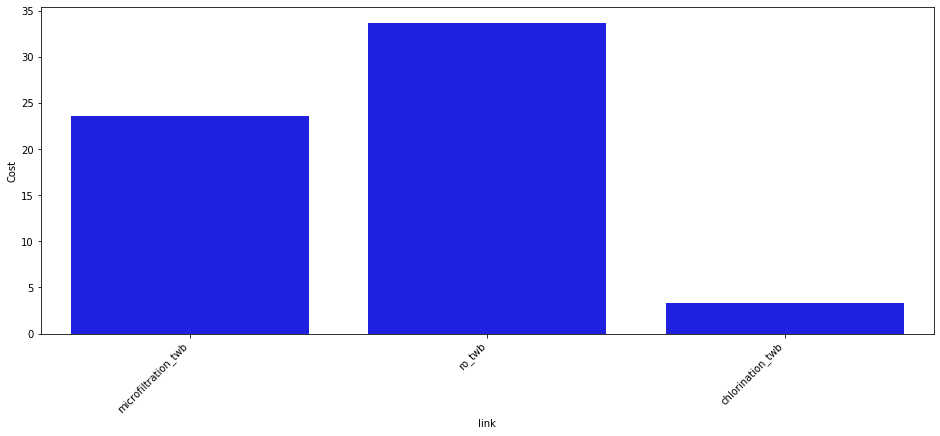

In [14]:
bar_chart = wt.post_processing.get_bar_chart(data = model_results, y_variable = 'Cost') 

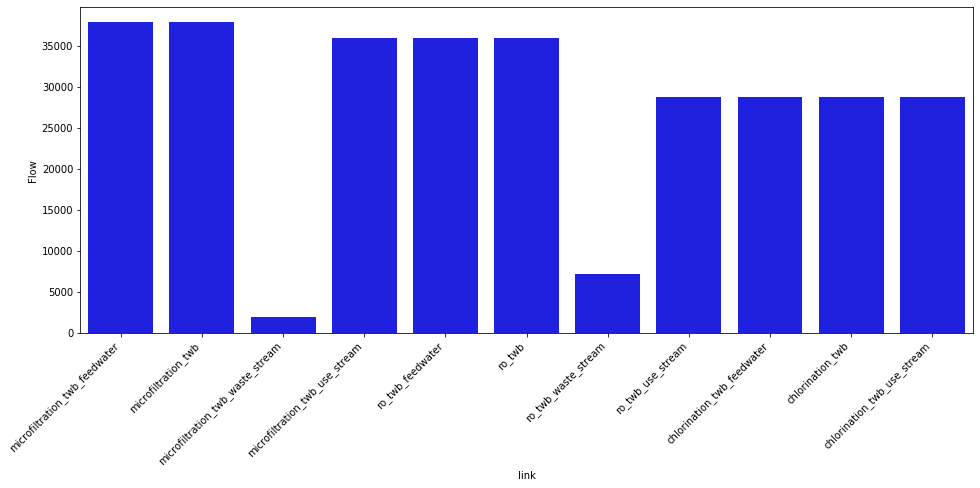

In [15]:
bar_chart = wt.post_processing.get_bar_chart(data = model_results, y_variable = 'Flow')  # TO DO BY LINK TYPE COLOR

In [16]:
wt.post_processing.get_pipeparity(M, variable = 'levelized_cost') # million $ per m3d output

0.0021069292471926223

##### Step 6: Run with alternative cost method (TWB vs. WT3)

In [17]:
M2 = wt.build_model(T, cost_method='twb')

In [18]:
results = wt.run_model(model = M2)

In [19]:
analysis_variables = ['Flow', 'TOC' , 'Nitrate', 'Cost', 'TDS']
model_results = wt.post_processing.get_result_table(M2, analysis_variables)
model_results

,Flow,TOC,Nitrate,Cost,TDS
microfiltration_twb_feedwater,37854.118,140.0,0.0,0.000,0.0
microfiltration_twb,37854.118,140.0,0.0,25.000,0.0
microfiltration_twb_waste_stream,1892.706,0.0,0.0,0.000,0.0
microfiltration_twb_use_stream,35961.412,140.0,0.0,0.000,0.0
ro_twb_feedwater,35961.412,140.0,0.0,0.000,0.0
ro_twb,35961.412,140.0,0.0,35.625,0.0
ro_twb_waste_stream,7192.282,133.0,0.0,0.000,0.0
ro_twb_use_stream,28769.130,7.0,0.0,0.000,0.0
chlorination_twb_feedwater,28769.130,7.0,0.0,0.000,0.0
chlorination_twb,28769.130,7.0,0.0,7.071,0.0


In [20]:
wt.post_processing.get_pipeparity(M2, variable = 'levelized_cost') # million $ per m3d output

0.0023530845891349974

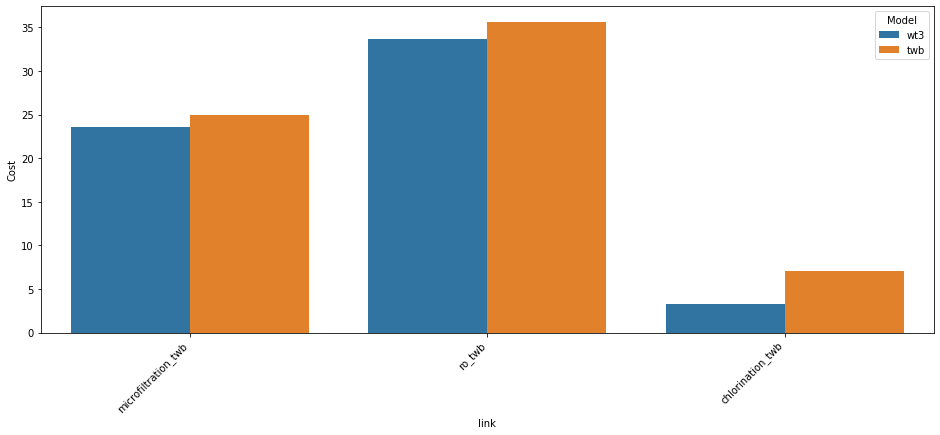

In [21]:
# Compare the two cost methods TWB and WT3
d1 = wt.post_processing.get_bar_chart(models = [M, M2], model_names = ['wt3', 'twb'],
                                 compare_trains = True, y_variable = 'Cost')

### BELOW IS FOR TESTING ONLY --- PLEASE IGNORE

In [26]:
from src import microfiltration_twb
from src import ro_twb
from src import chlorination_twb

In [27]:
microfiltration_twb.cap_scaling_exp

1

In [28]:
mu = 0.6
sigma = .1
num_reps = 500

In [29]:
input_list = np.random.normal(mu,sigma, size = num_reps) #, sigma, num_reps).round(4)

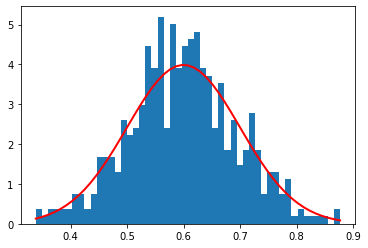

In [30]:
count, bins, ignored = plt.hist(input_list, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()

In [31]:
def monte_run(pct_to_target1):
    print('goes in')
    cost_range_list = [];
    for value_change in pct_to_target1:
        microfiltration_twb.cap_scaling_exp = value_change
        ro_twb.cap_scaling_exp = value_change
        chlorination_twb.cap_scaling_exp = value_change
        M = wt.build_model(T)
        results = wt.run_model(model=M)
        model_results = wt.post_processing.get_result_table(M, analysis_variables)
        cost_range_list.append(model_results.Cost.sum())

    return cost_range_list

In [32]:
from multiprocessing import Pool
import multiprocessing

In [33]:
no_of_proc = 4
list_final = []
for i in range(no_of_proc):
    part2 = len(input_list) / no_of_proc
    i2 = ((i+1)*part2)
    list1 = input_list[int(i*part2):int(i2)]
    list_final.append(list1)

In [34]:
pool=Pool()
dfs = pool.map(monte_run, list_final) #SomeClass().preprocess_data()

goes in
goes in
goes in
goes in


In [35]:
joinedlist = dfs[0] + dfs[1] + dfs[2] + dfs[3]

In [36]:
df = pd.DataFrame()
df['price'] = joinedlist
df['input_list'] = input_list

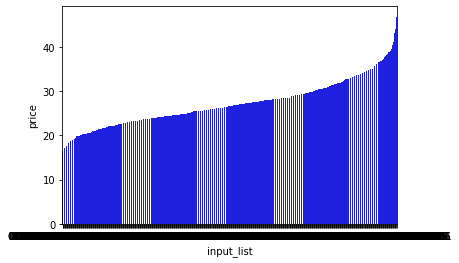

In [37]:
figure = sns.barplot(x='input_list', y='price', data=df, color = 'blue')

In [39]:
input_list.max()

0.8771113934793051